In [25]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import cv2

In [26]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'kumbakonam_places'



In [27]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [28]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
for layer in inception.layers:
    layer.trainable = False

In [30]:
folders = glob('kumbakonam_places/*')
folders

['kumbakonam_places\\Airavatheeswarar Temple Kumbakonam',
 'kumbakonam_places\\Ayi Kulam Kumbakonam',
 'kumbakonam_places\\Ezhutharinathar Temple Innambur',
 'kumbakonam_places\\Garuda sevai kumbakonam',
 "kumbakonam_places\\Government Men's College kumbakonam",
 "kumbakonam_places\\government women's college kumbakonam",
 'kumbakonam_places\\Handloom Silk making kumbakonam',
 'kumbakonam_places\\Krishna school fire accident kumbakonam',
 'kumbakonam_places\\Kumbeshwarar Temple kumbakonam',
 'kumbakonam_places\\Mahamaha kulam kumbakonam',
 'kumbakonam_places\\MGR school kumbakonam',
 'kumbakonam_places\\Nageshwarar Temple kumbakonam',
 'kumbakonam_places\\Navagraha Temple',
 'kumbakonam_places\\Potramarai kulam Kumbakonam',
 'kumbakonam_places\\Ramaswamy Temple Kumbakonam',
 'kumbakonam_places\\sri vedanarayana perumal temple kumbakonam',
 'kumbakonam_places\\Srinivasa Ramanujam House']

In [31]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [32]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 111, 111, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_18

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [33]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Training Generator
training_set = train_datagen.flow_from_directory('kumbakonam_places',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 696 images belonging to 17 classes.


In [36]:
# Testing Generator
test_set = test_datagen.flow_from_directory('kumbakonam_places',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 696 images belonging to 17 classes.


In [37]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_12584\2470280257.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
22/22 [==============================] - 36s 2s/step - loss: 20.1842 - accuracy: 0.1767 - val_loss: 8.4994 - val_accuracy: 0.4267
Epoch 2/100
22/22 [==============================] - 31s 1s/step - loss: 6.1739 - accuracy: 0.5129 - val_loss: 2.9034 - val_accuracy: 0.6624
Epoch 3/100
22/22 [==============================] - 32s 1s/step - loss: 3.5193 - accuracy: 0.6537 - val_loss: 3.7259 - val_accuracy: 0.6264
Epoch 4/100
22/22 [==============================] - 32s 1s/step - loss: 2.7796 - accuracy: 0.6954 - val_loss: 2.1820 - val_accuracy: 0.7184
Epoch 5/100
22/22 [==============================] - 31s 1s/step - loss: 2.1969 - accuracy: 0.7270 - val_loss: 0.9652 - val_accuracy: 0.8362
Epoch 6/100
22/22 [==============================] - 31s 1s/step - loss: 2.0221 - accuracy: 0.7773 - val_loss: 2.2705 - val_accuracy: 0.7672
Epoch 7/100
22/22 [==============================] - 32s 1s/step - loss: 2.2328 - accuracy: 0.7730 - val_loss: 1.6767 - val_accuracy: 0.7830
Epoch 8/100


In [43]:
from sklearn.metrics import classification_report
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Convert true labels to class labels
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

22/22 [==============================] - 15s 660ms/step
                                            precision    recall  f1-score   support

        Airavatheeswarar Temple Kumbakonam       0.00      0.00      0.00        33
                      Ayi Kulam Kumbakonam       0.13      0.12      0.13        16
           Ezhutharinathar Temple Innambur       0.03      0.03      0.03        35
                   Garuda sevai kumbakonam       0.05      0.06      0.06        54
       Government Men's College kumbakonam       0.11      0.09      0.10        32
           Handloom Silk making kumbakonam       0.05      0.04      0.04        45
   Krishna school fire accident kumbakonam       0.05      0.05      0.05        62
            Kumbeshwarar Temple kumbakonam       0.10      0.09      0.09        46
                     MGR school kumbakonam       0.07      0.07      0.07        41
                 Mahamaha kulam kumbakonam       0.03      0.03      0.03        36
             Nagesh

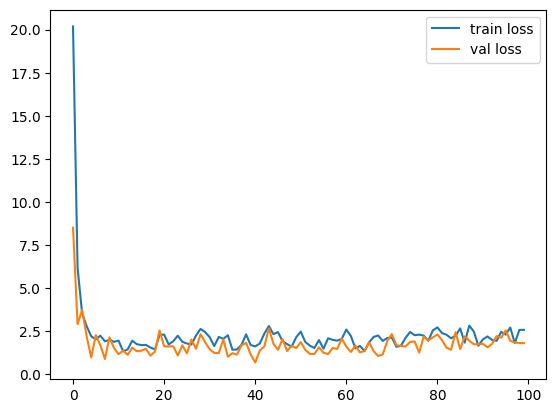

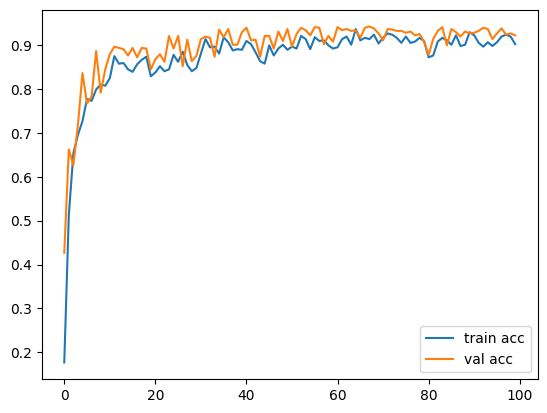

<Figure size 640x480 with 0 Axes>

In [39]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
y_pred = model.predict(test_set)
y_pred

22/22 [==============================] - 17s 761ms/step


array([[3.8622661e-38, 4.8614969e-13, 3.3542740e-06, ..., 5.0976117e-14,
        1.0204984e-04, 2.9120843e-27],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2731833e-24, 3.6890863e-23, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.8154976e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.8774417e-37, 3.4831869e-30, 2.8724685e-23, ..., 0.0000000e+00,
        7.2323949e-35, 8.2609969e-38]], dtype=float32)

In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 6,  0,  7, 10,  2,  5, 13, 10, 10,  0,  0,  2,  6,  8, 10, 10, 10,
        2,  3, 12, 16,  5, 14,  6, 13,  7, 12,  8, 12, 16,  8, 16,  1, 14,
       16, 13,  9,  2, 13,  6,  6,  5, 12,  9,  3, 14,  9, 10, 10,  9, 12,
        5,  0, 10,  8,  8, 12,  3,  5,  8,  6, 14,  5,  8,  6,  9, 12, 12,
       12,  0,  3,  6, 10, 16, 14,  0,  8,  7,  6, 13, 11,  9, 14, 16, 10,
        3, 11,  7, 11,  3, 12,  8,  4,  4, 10,  7, 12, 12, 11,  9, 12, 15,
       10, 14, 12, 13,  5,  4,  3,  0,  6,  6,  9, 12, 13,  9, 11,  3, 10,
        5, 15,  5,  5, 15,  2,  4,  1, 11, 13,  7, 13, 13,  2, 11,  7,  0,
       14,  2,  5, 10,  3,  7,  5, 13,  6, 16, 16, 11,  8,  5,  6, 11, 10,
        8,  9,  4,  9,  3, 12, 16, 12,  5, 12,  2,  8,  5, 11, 12,  9,  7,
       10,  5,  2,  9,  4,  0, 14,  2, 13,  2,  6, 13, 12, 14, 13, 13, 13,
       10,  1,  6, 10,  9,  2, 12, 10,  8, 12, 10, 13,  2,  6, 16, 10, 16,
       12,  2,  6, 12, 14,  7,  6,  5, 11,  6,  6,  3,  0,  4,  3,  8, 14,
       16,  8, 16, 10, 11